# Programming Practice II
## 1 Overview
In this practice, you are asked to implement a neural network with one hidden layer for regression using NumPy only. In particular, you are expected to learn to
* implement simple activation functions;
* get familiar with gradient descent algorithms;
* get familiar with back-propagation algorithms in neural networks.

## 2 Tasks
In this section, you can start the programming practice task by task. Please pay attention to the hints as well as the API documents available online.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Define Sigmoid Function

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    # TODO



In [4]:
x = np.array(range(5))

print(sigmoid(x))

[0.5        0.73105858 0.88079708 0.95257413 0.98201379]


### 2.2 Define Derivative of Sigmoid Function

In [5]:
def derivative_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))
    # TODO

### 2.3 Plot Functions

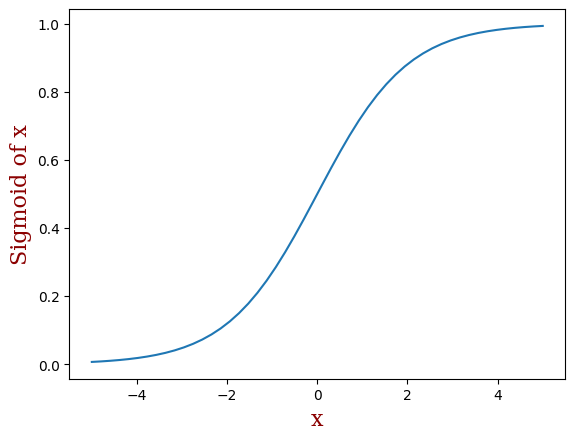

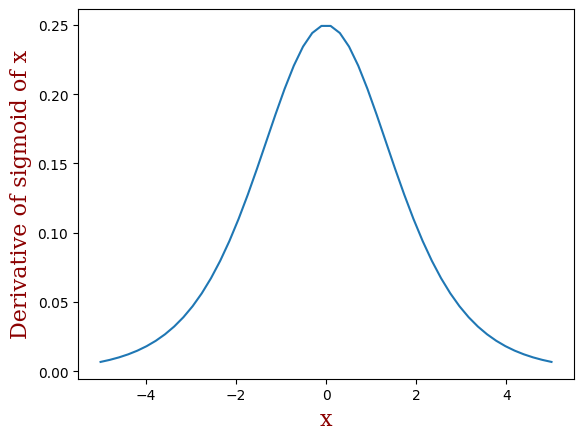

In [6]:
# TODO: plotting

x = np.linspace(-5,5,50)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

#print(sigmoid(x))
plt.plot(x,sigmoid(x))
plt.xlabel('x',fontdict=font)
plt.ylabel('Sigmoid of x',fontdict=font)
plt.show()

#print(derivative_sigmoid(x))
plt.plot(x,derivative_sigmoid(x))
plt.xlabel('x',fontdict=font)
plt.ylabel('Derivative of sigmoid of x',fontdict=font)
plt.show()

### 2.4 Define Neural Network

In [7]:
import numpy as np
def forward_pass(x, w1, b1, w2, b2):
    x=x.reshape(x.shape[0],1)
    # Output layer
    y_hat = np.dot(sigmoid(np.dot(x, w1.T) + b1.T),w2) + b2
    return y_hat

### 2.5 Define Loss Function

In [8]:
def mse(y_true, y_pred):
    return np.sum((y_pred-y_true)**2)/y_true.shape[0]
    # TODO

def derivative_mse(y_true, y_pred):
    return -2*(np.sum((y_pred-y_true))/y_true.shape[0])
    # TODO
    

### 2.6 Define Gradient

In [9]:
def cal_gradient(x, y, y_hat, w1, b1, w2, b2):
    # Hidden layer
    Z1 = np.dot(x, w1.T) + b1.T
    A1 = sigmoid(Z1)

    # Output layer
    y_pred = np.dot(A1, w2) + b2
    
    
    
    m = x.shape[0]

    # Output layer
    dZ2 = y_pred - y
    dLdw2 = (1 / m) * np.dot(A1.T, dZ2)
    dLdb2 = (1 / m) * np.sum(dZ2, axis=0)

    # Hidden layer
    dZ1 = np.dot(dZ2, w2.T) * derivative_sigmoid(A1)
    dLdw1 = (1 / m) * np.dot(x.T, dZ1)
    dLdb1 = (1 / m) * np.sum(dZ1, axis=0)
    dLdb1 = dLdb1.reshape(dLdb1.shape[0],1)
    
    return dLdw1, dLdb1, dLdw2, dLdb2

### 2.7 Update Weights

In [10]:
def update_parameters(w1, b1, w2, b2, dLdw1, dLdb1, dLdw2, dLdb2, learning_rate):
    w1 -=(learning_rate*dLdw1.T)
    b1 -=(learning_rate*dLdb1)
    w2 -=(learning_rate*dLdw2)
    b2 -=(learning_rate*dLdb2)
    return w1, b1, w2, b2

### 2.8 Train Network

In [16]:
# TODO: datasets
# Generate sample input data
class dataset:
    def create_dataset(self, n_samples=100):
        x = np.linspace(-1,1,n_samples)
        y = 0.1*x + x**2 + x**3
        return x,y
    
n_samples = 100
x , y = dataset.create_dataset(n_samples)
x = x.reshape(x.shape[0],1)
y = y.reshape(y.shape[0],1)

# TODO: hyperparameters, parameter initialization, Initialize weights and biases

np.random.seed(42)
n_nuerons_hidden_size = 500

w1 = np.random.randn(n_nuerons_hidden_size,1)
b1 = np.zeros((n_nuerons_hidden_size,1))
w2 = np.random.randn(n_nuerons_hidden_size, 1)
b2 = np.zeros((1, 1))

learning_rate = 0.01

# TODO: training

def train(X, y, num_iterations, learning_rate):
    n_inputs = X.shape[1]

    a = np.array([1])
    for i in range(num_iterations):
        # Forward propagation
        #A1, A2 = forward_propagation(X, W1, b1, W2, b2)

        # Backward propagation
        y_hat = forward_pass(x, w1, b1, w2, b2)
        dLdw1, dLdb1, dLdw2, dLdb2 = cal_gradient(x, y, y_hat, w1, b1, w2, b2)
        update_parameters(w1, b1, w2, b2, dLdw1, dLdb1, dLdw2, dLdb2, learning_rate)
        

        if (i+1) % 500 == 0:
            loss = np.mean((y - y_hat) ** 2)
            a = np.append(a, loss)
            print(f"Epoch: {i+1}, Loss: {loss}")

    return w1, b1, w2, b2


# Normalize the input data
#X_normalized = X / np.max(X)

# Train the neural network
num_iterations =  5000
learning_rate = 0.01
W1, b1, W2, b2 = train(x, y, num_iterations, learning_rate)

# Predict using the trained network
predictions = forward_pass(x, w1, b1, w2, b2)



Iteration: 500, Loss: 0.09961544604747898
Iteration: 1000, Loss: 0.09113367703314512
Iteration: 1500, Loss: 0.08339550087545429
Iteration: 2000, Loss: 0.07633493245854017
Iteration: 2500, Loss: 0.06989228144448642
Iteration: 3000, Loss: 0.06401341624320644
Iteration: 3500, Loss: 0.05864913956047138
Iteration: 4000, Loss: 0.05375465691347414
Iteration: 4500, Loss: 0.04928912213975525
Iteration: 5000, Loss: 0.04521524639180179
Iteration: 5500, Loss: 0.04149895934727229
Iteration: 6000, Loss: 0.03810911334511203
Iteration: 6500, Loss: 0.035017222873883425
Iteration: 7000, Loss: 0.032197233298041444
Iteration: 7500, Loss: 0.029625313927993554
Iteration: 8000, Loss: 0.0272796715435818
Iteration: 8500, Loss: 0.025140381293981676
Iteration: 9000, Loss: 0.02318923254654552
Iteration: 9500, Loss: 0.021409587768531926
Iteration: 10000, Loss: 0.019786252922906138
Iteration: 10500, Loss: 0.018305358164005407
Iteration: 11000, Loss: 0.016954247849575145
Iteration: 11500, Loss: 0.015721379058549808


### 2.9 Plot Results

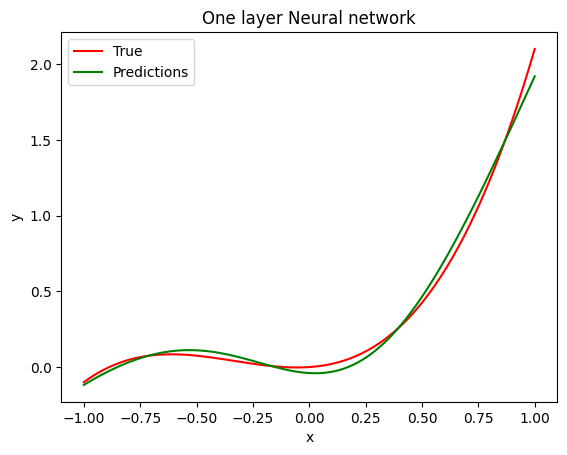

In [20]:
# TODO: plotting for comparison between the prediction and ground truth

import matplotlib.pyplot as plt
plt.plot(x, y, color='r', label = 'True')
plt.legend(loc='upper left')
plt.plot(x, predictions, color='g', label = 'Predictions')
plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("One layer Neural network")
plt.show()



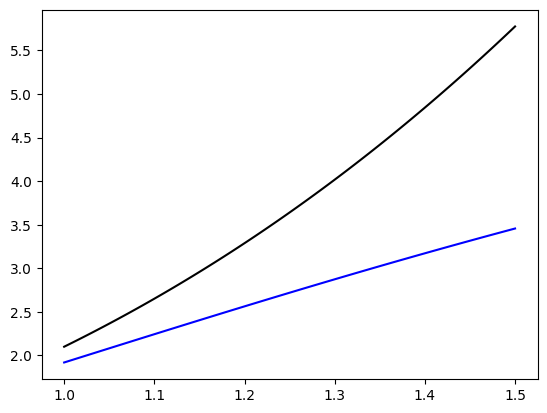

In [19]:
x1 = np.linspace(1,1.5,n_samples)
y1 = 0.1*x1 + x1**2 + x1**3
predictions1 = forward_pass(x1, w1, b1, w2, b2)
plt.plot(x1, predictions1, color='b', label = 'Predictions')
plt.plot(x1, y1, color='k', label = 'Predictions')
